#Automation of bank credit processes



In [982]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [983]:
df = pd.read_csv("drive/MyDrive/AI Night Challenge/data/loan-train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [984]:
df.shape

(614, 13)

In [985]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [986]:
df.dropna(axis=0, inplace=True)

In [987]:
#replace the nan values of the dataset with most frequently values
df = df.fillna(df.mode().iloc[0])

In [988]:
df['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
df['Married'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['Education'].replace(['Not Graduate', 'Graduate'], [0, 1], inplace=True)
df['Self_Employed'].replace(['No', 'Yes'], [0, 1], inplace=True)
df['Dependents'].replace(['0', '1', '2', '3+'], [0, 1, 2, 3], inplace=True)

In [989]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,Y


###Visualization of the data

<Axes: xlabel='Self_Employed', ylabel='Loan_Status'>

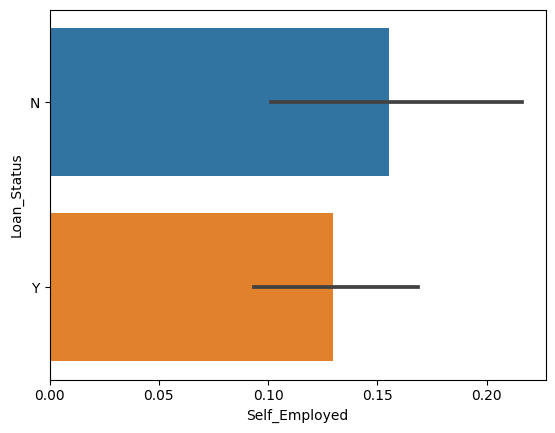

In [990]:
import seaborn as sns
sns.barplot(data=df, x='Self_Employed', y='Loan_Status')

<Axes: xlabel='Education', ylabel='Loan_Status'>

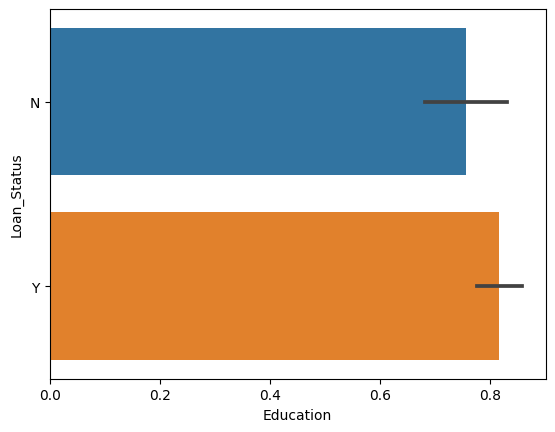

In [991]:
sns.barplot(data=df, x='Education', y='Loan_Status')

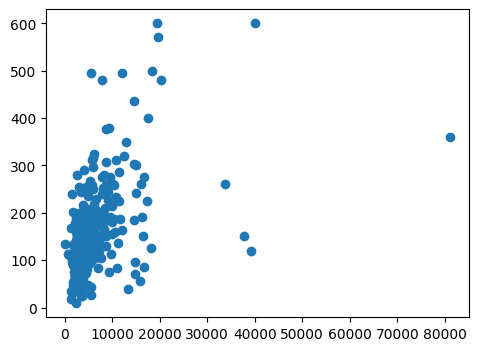

In [992]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(x=df["ApplicantIncome"], y=df["LoanAmount"])

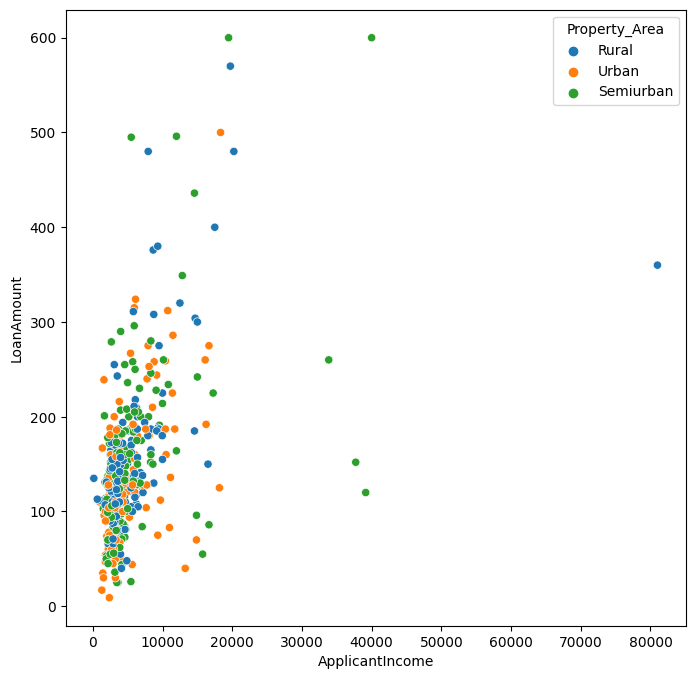

In [993]:
plt.figure(figsize=(8,8))
sns.scatterplot(x=df["ApplicantIncome"], y=df["LoanAmount"], hue=df["Property_Area"])
plt.show()

In [994]:
from sklearn.preprocessing import OneHotEncoder

categorical_features = df[['Property_Area']]
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(categorical_features)
one_hot_encoded = one_hot_encoded.toarray()

In [995]:
df = df.drop(['Property_Area'], axis=1)
df = pd.concat([df, pd.DataFrame(one_hot_encoded)], axis=1)
print(df.head())

    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
1  LP001003     0.0      1.0         1.0        1.0            0.0   
2  LP001005     0.0      1.0         0.0        1.0            1.0   
3  LP001006     0.0      1.0         0.0        0.0            0.0   
4  LP001008     0.0      0.0         0.0        1.0            0.0   
5  LP001011     0.0      1.0         2.0        1.0            1.0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1           4583.0             1508.0       128.0             360.0   
2           3000.0                0.0        66.0             360.0   
3           2583.0             2358.0       120.0             360.0   
4           6000.0                0.0       141.0             360.0   
5           5417.0             4196.0       267.0             360.0   

   Credit_History Loan_Status    0    1    2  
1             1.0           N  0.0  0.0  1.0  
2             1.0           Y  0.0  0.0  1.0  
3          

In [996]:
Y_train = df['Loan_Status']
X_train = df.drop('Loan_Status', axis=1)
X_train = X_train.drop('Loan_ID', axis=1)

In [997]:
Y_train

1        N
2        Y
3        Y
4        Y
5        Y
      ... 
467    NaN
468    NaN
473    NaN
477    NaN
479    NaN
Name: Loan_Status, Length: 587, dtype: object

In [998]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,0,1,2
1,0.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,0.0,0.0,1.0
5,0.0,1.0,2.0,1.0,1.0,5417.0,4196.0,267.0,360.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0


In [999]:
Y_train.replace(['N', 'Y'], [0, 1], inplace=True)

In [1000]:
Y_train

1      0.0
2      1.0
3      1.0
4      1.0
5      1.0
      ... 
467    NaN
468    NaN
473    NaN
477    NaN
479    NaN
Name: Loan_Status, Length: 587, dtype: float64

In [1001]:
X_train.columns

Index([           'Gender',           'Married',        'Dependents',
               'Education',     'Self_Employed',   'ApplicantIncome',
       'CoapplicantIncome',        'LoanAmount',  'Loan_Amount_Term',
          'Credit_History',                   0,                   1,
                         2],
      dtype='object')

In [1002]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,0,1,2
1,0.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,0.0,0.0,1.0
5,0.0,1.0,2.0,1.0,1.0,5417.0,4196.0,267.0,360.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0
477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0


In [1003]:
X_train.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,0,1,2
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.179167,0.647917,0.777083,0.797917,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,0.289583,0.397917,0.312500
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.454042,0.489979,0.463996
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,2.000000,1.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,1.000000,1.000000,1.000000


In [1004]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 587 entries, 1 to 479
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    float64
 1   Married            480 non-null    float64
 2   Dependents         480 non-null    float64
 3   Education          480 non-null    float64
 4   Self_Employed      480 non-null    float64
 5   ApplicantIncome    480 non-null    float64
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  0                  480 non-null    float64
 11  1                  480 non-null    float64
 12  2                  480 non-null    float64
dtypes: float64(13)
memory usage: 64.2 KB


In [1005]:
X_train.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      405
CoapplicantIncome    232
LoanAmount           186
Loan_Amount_Term       9
Credit_History         2
0                      2
1                      2
2                      2
dtype: int64

In [1006]:
data_test = pd.read_csv("drive/MyDrive/AI Night Challenge/data/loan-test.csv")
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [1007]:
data_test.shape

(367, 12)

In [1008]:
data_test.dropna(inplace=True)
data_test.fillna(data_test.mode().iloc[0], inplace=True)
X_test = data_test.drop('Loan_ID', axis=1)
X_test['Gender'].replace(['Male', 'Female'], [0, 1], inplace=True)
X_test['Married'].replace(['No', 'Yes'], [0, 1], inplace=True)
X_test['Education'].replace(['Not Graduate', 'Graduate'], [0, 1], inplace=True)
X_test['Self_Employed'].replace(['No', 'Yes'], [0, 1], inplace=True)
X_test['Dependents'].replace(['0', '1', '2', '3+'], [0, 1, 2, 3], inplace=True)

In [1009]:
categorical_features1 = X_test[['Property_Area']]
encoder1 = OneHotEncoder()
one_hot_encoded_1 = encoder1.fit_transform(categorical_features1)

one_hot_encoded_1 = one_hot_encoded_1.toarray()


X_test = X_test.drop(['Property_Area'], axis=1)
X_test = pd.concat([X_test, pd.DataFrame(one_hot_encoded_1)], axis=1)

print(X_test.head())

   Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0     0.0      1.0         0.0        1.0            0.0           5720.0   
1     0.0      1.0         1.0        1.0            0.0           3076.0   
2     0.0      1.0         2.0        1.0            0.0           5000.0   
4     0.0      0.0         0.0        0.0            0.0           3276.0   
5     0.0      1.0         0.0        0.0            1.0           2165.0   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History    0    1  \
0                0.0       110.0             360.0             1.0  0.0  0.0   
1             1500.0       126.0             360.0             1.0  0.0  0.0   
2             1800.0       208.0             360.0             1.0  0.0  0.0   
4                0.0        78.0             360.0             1.0  0.0  0.0   
5             3422.0       152.0             360.0             1.0  0.0  1.0   

     2  
0  1.0  
1  1.0  
2  1.0  
4  1.0  
5  0.0  


In [1010]:
X_test = df.fillna(df.mode().iloc[0])

In [1011]:
X_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,0,1,2
1,LP001003,0.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0,0.0,1.0
2,LP001005,0.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,1.0,0.0,0.0,1.0
3,LP001006,0.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,1.0,0.0,0.0,1.0
4,LP001008,0.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,1.0,0.0,0.0,1.0
5,LP001011,0.0,1.0,2.0,1.0,1.0,5417.0,4196.0,267.0,360.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,LP001003,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,1.0,1.0,0.0,0.0
468,LP001003,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,1.0,0.0,0.0,1.0
473,LP001003,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,1.0,1.0,0.0,0.0
477,LP001003,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,1.0,0.0,0.0,1.0


In [1012]:
print(X_test.head())

X_test.fillna(X_test.mode().iloc[0], inplace=True)

    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
1  LP001003     0.0      1.0         1.0        1.0            0.0   
2  LP001005     0.0      1.0         0.0        1.0            1.0   
3  LP001006     0.0      1.0         0.0        0.0            0.0   
4  LP001008     0.0      0.0         0.0        1.0            0.0   
5  LP001011     0.0      1.0         2.0        1.0            1.0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1           4583.0             1508.0       128.0             360.0   
2           3000.0                0.0        66.0             360.0   
3           2583.0             2358.0       120.0             360.0   
4           6000.0                0.0       141.0             360.0   
5           5417.0             4196.0       267.0             360.0   

   Credit_History  Loan_Status    0    1    2  
1             1.0          0.0  0.0  0.0  1.0  
2             1.0          1.0  0.0  0.0  1.0  
3       

In [1013]:
Y_test = X_test['Loan_Status']
X_test = X_test.drop('Loan_Status', axis=1)
X_test = X_test.drop('Loan_ID', axis=1)

In [1014]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,0,1,2
1,0.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,0.0,0.0,1.0
5,0.0,1.0,2.0,1.0,1.0,5417.0,4196.0,267.0,360.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,1.0,0.0,0.0
468,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,0.0,0.0,1.0
473,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,1.0,0.0,0.0
477,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,0.0,0.0,1.0


In [1015]:
Y_test

1      0.0
2      1.0
3      1.0
4      1.0
5      1.0
      ... 
467    1.0
468    1.0
473    1.0
477    1.0
479    1.0
Name: Loan_Status, Length: 587, dtype: float64

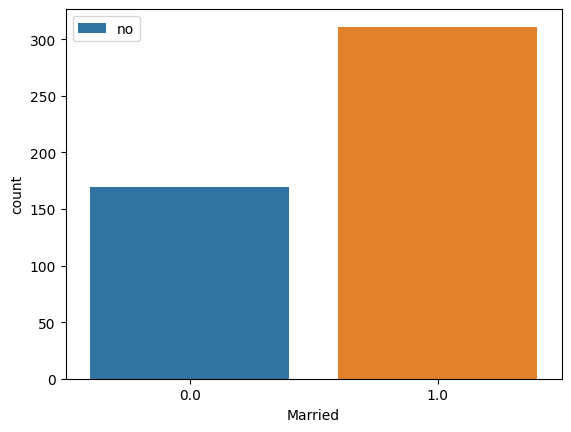

In [1016]:
import seaborn as sns
sns.countplot(x='Married', data=X_train).legend(labels=['no', 'yes'])

Training the dataset using Random Forests

In [1017]:
X_train = X_train.fillna(X_train.mode().iloc[0])
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,0,1,2
1,0.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,0.0,0.0,1.0
5,0.0,1.0,2.0,1.0,1.0,5417.0,4196.0,267.0,360.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,1.0,0.0,0.0
468,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,0.0,0.0,1.0
473,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,1.0,0.0,0.0
477,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,0.0,0.0,1.0


In [1018]:
Y_train.shape

(587,)

In [1019]:
X_test.columns = [(str(col),) for col in X_test.columns]

In [1020]:
X_train.columns = X_train.columns.astype(str)

In [1021]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,0,1,2
1,0.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,0.0,0.0,1.0
5,0.0,1.0,2.0,1.0,1.0,5417.0,4196.0,267.0,360.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,1.0,0.0,0.0
468,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,0.0,0.0,1.0
473,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,1.0,0.0,0.0
477,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,0.0,0.0,1.0


In [1022]:
Y_train = Y_train.fillna(Y_train.mode().iloc[0])

In [1023]:
Y_train

1      0.0
2      1.0
3      1.0
4      1.0
5      1.0
      ... 
467    1.0
468    1.0
473    1.0
477    1.0
479    1.0
Name: Loan_Status, Length: 587, dtype: float64

In [1024]:
X_test

,"(Gender,)","(Married,)","(Dependents,)","(Education,)","(Self_Employed,)","(ApplicantIncome,)","(CoapplicantIncome,)","(LoanAmount,)","(Loan_Amount_Term,)","(Credit_History,)","(0,)","(1,)","(2,)"
1,0.0,1.0,1.0,1.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,2583.0,2358.0,120.0,360.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,6000.0,0.0,141.0,360.0,1.0,0.0,0.0,1.0
5,0.0,1.0,2.0,1.0,1.0,5417.0,4196.0,267.0,360.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
467,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,1.0,0.0,0.0
468,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,0.0,0.0,1.0
473,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,1.0,0.0,0.0
477,0.0,1.0,0.0,1.0,0.0,2500.0,0.0,100.0,360.0,1.0,0.0,0.0,1.0


In [1025]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, Y_train)

y_pred = model1.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [1026]:
print("Train score: ", model1.score(X_train, Y_train))
print("Test score: ", model1.score(X_test, Y_test))

Train score:  1.0
Test score:  1.0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


##Improve the performance of the model

Cross Validation with 10 folds

In [1027]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model1, X_train, Y_train, cv=10)

In [1028]:
print("Mean accuracy:", cv_scores.mean())
print("The standard deviation:", cv_scores.std())

Mean accuracy: 0.763676212741087
The standard deviation: 0.07240988366887927


Adjusting hyperparameters of the model

In [1029]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5)
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10)

In [1030]:
accuracy = dt.score(X_test, Y_test)
print("accuracy: ", accuracy)

accuracy:  0.8534923339011925


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [1031]:
def predictCredit(data):
  y = dt.predict(data)
  if y==0:
    print("Unfortunately, we regret to inform you that your loan application has been declined")
  else:
    print("Welcome dear client, you can get a loan. Please be advised that you are welcome to visit our nearest office at any convenient time in the near future.")

In [1032]:
data = np.array([1, 0, 0, 1, 0, 3000, 0, 100, 360, 0, 0, 0, 1])
data = data.reshape(1, -1)
predictCredit(data)

Unfortunately, we regret to inform you that your loan application has been declined


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
